# Graph Theory 1: Euleurian Tours
BS. Vương Kiến Thanh

# K¨onigsberg Bridge Problem: 
Bạn có thể rời nhà bạn, đi tất cả mọi cây cầu trong thành phố một lần duy nhất và về nhà?

![konigsberg](https://mathworld.wolfram.com/images/gifs/koenigsb.gif)
![graph](https://mathworld.wolfram.com/images/eps-gif/KoenigsbergBridges_901.gif)

Bài toán này được trả lời bởi Euler (1736), là cơ sở hình thành graph theory.

---
SKIP THESE

In [1]:
import pygraphviz as pgv
import networkx as nx
import graphviz as gv
import numpy as np
def render(G, engine='circo', eul_label=False, list_of_samerank=None):
    G = nx.drawing.nx_agraph.to_agraph(G)
    G.node_attr['width']=0.5
    if not list_of_samerank is None:
        engine = 'dot'
        samerank(G, list_of_samerank)
    if eul_label is True:
        G = label_circuit(G)
    return gv.Source(G.string(), engine=engine)
def label_circuit(G):
    cache = []
    eul_edges = list(nx.eulerian_circuit(nx.MultiGraph(G.edges())))
    for i, (e1, e2) in  enumerate(eul_edges):
        back = 0
        if (e2,e1) in cache or (e1,e2) in cache:
            back = cache.count((e1,e2)) +  cache.count((e2,e1))
        if isinstance(G, nx.classes.multigraph.MultiGraph):
            G.edges[e1,e2,back]['label']= i
        else:
            G.get_edge(e1,e2,back).attr['label']= i
        cache.append((e1,e2))
    return G
def samerank(AG, list_of_same_rank):
    for i in list_of_same_rank:
        AG.add_subgraph(list(i), rank='same')

END SKIP

---

# Definition
G = (V, E), gồm 2 tập hợp: V(G), E(G)
- G: Graph  
- V: Vertex, vertices, nodes
- E: Edges

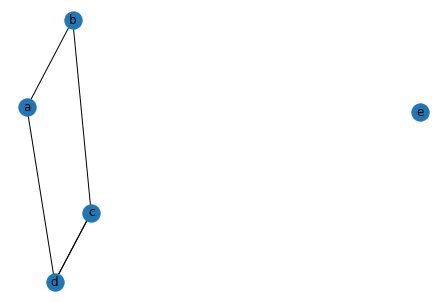

In [2]:
# V(G) = {a, b, c, d, e}
# E(G) = {ab, cd, cd, bb, ad, bc}
nodes = list('abcde')
edges = ['ab', 'cd', 'cd', 'bb', 'ad', 'bc']

# nx.MultiGraph allows multi-edges
G = nx.MultiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# plt cant draw curve edges
nx.draw(G, with_labels=True)

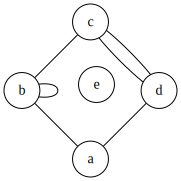

In [3]:
render(G)

# Graph can be represented by different drawings

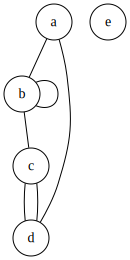

In [4]:
render(G, 'dot')

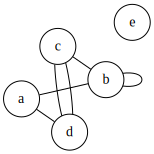

In [5]:
render(G, 'fdp')

# Terminology

- **Endpoint:** edge xy has endpoint x & y. 
- **Incidence:** x is incident to edge xy.
- **Adjacency:** vertex x is adjacent to  vertex y if there is edge xy.
- **Neighbors:** all adjacent vertices to x are neighbour of x, denoted N(x).
- **Isolated vertex:** a node with no edges.
- **Loop:** edge with both endpoints are the same vertex.
- **Multi-edges:** more than 1 edge with same endpoints.
- **Simple graph:** graph with no multi-edges or loops.
- **Degree:** the number of edges incident to vertex.
    - *Odd vertex:* odd degree
    - *Even vertex:* even degree

- **A walk** is a sequence of vertices so that there is an edge between consecutive vertices. A walk can repeat vertices and edges.
- **A trail** is a walk with no repeated edges. A trail can repeat vertices but not edges. 
- **A path** is a trail with no repeated vertex (or edges). A path on n vertices is denoted **P(n)**.
- **A closed walk** is a walk that starts and ends at the same vertex.
- **A circuit** is a closed trail; that is, a trail that starts and ends at the same vertex with no repeated edges though vertices may be repeated.
- **A cycle** is a closed path; that is, a path that starts and ends at the same vertex. Thus cycles cannot repeat edges or vertices. Note: we do not consider the starting and ending vertex as being repeated since each vertex is entered and exited exactly once. A cycle on n vertices is denoted **C(n)** .

The length of any of these tours is deﬁned in terms of the number of edges. For example, P(n)has length n − 1 and C(n) has length n.

- **An Eulerian circuit (or trail)** is a circuit (or trail) that contains every edge and every vertex of G. If G contains an Eulerian circuit it is called Eulerian and if G contains an Eulerian trail but not an Eulerian circuit it is called semi-Eulerian.

## Vậy bài toán Konisberg là graph đó có phải eulerian ko?

# Theorem: Làm sao để biết graph là euler hoặc semi-euler
A graph G is **Eulerian** if and only if
- G is connected and
- every vertex has even degree.

A graph G is **semi-Eulerian** if and only if
- G is connected and
- exactly two vertices have odd degree.

# Theorem khác: (Handshaking Lemma)
Let G = (V, E) be a graph and |E| denote the number of edges in G. Then the sum of the degrees of the vertices equals twice the number of edges; that is if V = {$v_1 , v_2 , ..., v_n$}, then  
<center>deg($v_1$) + deg($v_2$) + ··· + deg($v_n$) = 2|E|</center>

**Corollary**: There must be an even number of odd vertices in any graph G.

# Thuật toán
Thuật toán để tìm xem Graph có Eulerian circuit:
- Fleury’s Algorithm
- Hierholzer’s Algorithm

# Example:

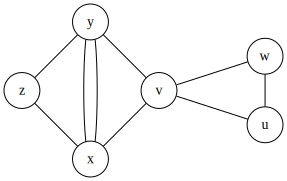

In [6]:
edges = ['vx', 'vw', 'vu', 'vy', 'wu', 'xy', 'xy', 'xz', 'yz']
G = nx.MultiGraph(edges)
render(G)

In [7]:
nx.is_eulerian(G)

True

In [8]:
nx.is_semieulerian(G)

False

In [9]:
list(nx.eulerian_circuit(G))

[('v', 'u'),
 ('u', 'w'),
 ('w', 'v'),
 ('v', 'y'),
 ('y', 'z'),
 ('z', 'x'),
 ('x', 'y'),
 ('y', 'x'),
 ('x', 'v')]

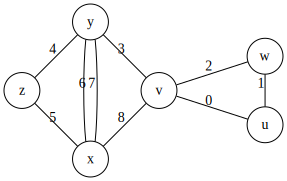

In [10]:
render(label_circuit(G))

# Eulerize: làm cho graph thành Eulerian circuit
Given a connected graph G = (V, E), an Eulerization of G is the graph G' = (V, E') so that
- G' is obtained by duplicating edges of G, and
- every vertex of G' is even.

A semi-Eulerization of G results in a graph G' so that
- G' is obtained by duplicating edges of G, and
- exactly two vertices of G' are odd.

# Thuật toán eulerize
Eulerization Method

1. Identify the odd vertices of the graph.
2. Pair up the odd vertices, trying to pair as many adjacent vertices as possible while also avoiding pairing vertices far away from each other.
3. Duplicate the edges along an optimal path from one vertex to its pair.

**Notes**: duplicating not adding 

In [11]:
# graph konigsberg 
edges = ['ca','ba','ba','ca', 'bd','cd','ad']
K = nx.MultiGraph(edges)

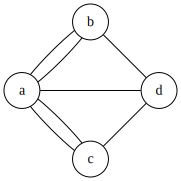

In [12]:
render(K)

In [13]:
nx.is_eulerian(K)

False

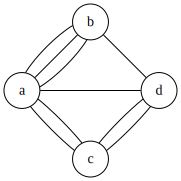

In [14]:
eul_K = nx.eulerize(K)
render(eul_K)

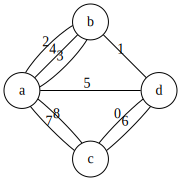

In [15]:
render(label_circuit(eul_K))

# Example:

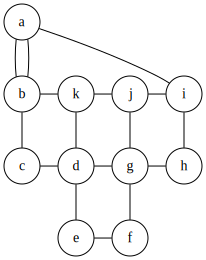

In [16]:
edges = ['ab','ab','kj','ji','bk','bc','cd','dg','de','ih','kd','jg','ef','gh','gf','ia']
G = nx.MultiGraph(edges)

render(G, list_of_samerank=['bkji', 'cdgh', 'ef'])

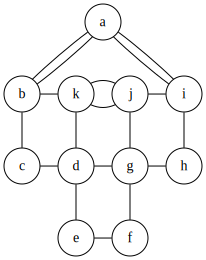

In [17]:
# Eulerize
eul_G = nx.eulerize(G)
render(eul_G, list_of_samerank=['bkji', 'cdgh', 'ef'])

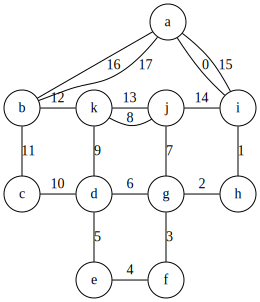

In [18]:
render(eul_G, list_of_samerank=['bkji', 'cdgh', 'ef'], eul_label=True)

# Example: Ví dụ này có rất nhiều solutions khác bằng algorithm đã mô tả

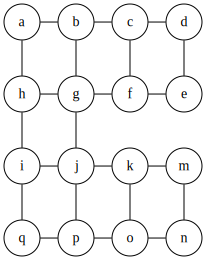

In [19]:
edges = ['ab','bc','cd','ah','bg','cf','de','hg','gf','fe','hi','gj','ij','jk','km','iq','jp','ko','mn',
    'qp','po','on']
G = nx.MultiGraph(edges)

render(G, list_of_samerank=['abcd', 'hgfe', 'ijkm', 'qpon'])

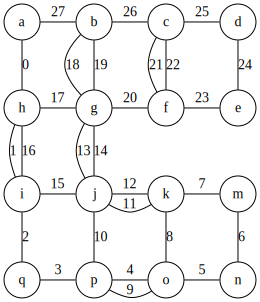

In [20]:
# con nhieu solutions khac bằng cách đổi source trong thuật toán nx.eulerian_circuit
render(nx.eulerize(G), list_of_samerank=['abcd', 'hgfe', 'ijkm', 'qpon'], eul_label=True)

# Chinese postman Problem

Giả sử như edges có trọng số, thì chinese postman problem là kiếm eulerian circuit sao cho tổng trọng số thấp nhất.

In [21]:
edges = ['ab','ab','kj','ji','bk','bc','cd','dg','de','ih','kd','jg','ef','gh','gf','ia']
weights = [20,10,6,2,3,4,6,5,5,8,5,5,5,7,5,12]
len(edges) == len(weights)

True

In [22]:
nx_G = nx.MultiGraph()
nx_G.add_weighted_edges_from([(x[0],x[1],w) for x,w in zip(edges,weights)])

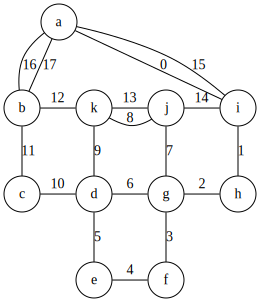

In [23]:
render(nx.eulerize(nx_G),eul_label=True, list_of_samerank=['bkji', 'cdgh', 'ef'])

# xem ra nx.eulerize không có dùng weight để tìm circuit. Thuật toán chinese postman liên quan đến shortest path. Ta sẽ tìm hiểu sau.

# Exercise:
1. Let G be a graph with vertex set V (G) = {a, b, c, d, e} and edge set E(G) = {ab, ae, bc, cd, de, ea, eb}.
- [ ] Draw G.
- [ ] Is G connected?
- [ ] Is G simple?
- [ ] List the degrees of every vertex.
- [ ] Find all edges incident to b.
- [ ] List all the neighbors of a.
- [ ] Find a walk, trail, and path in G, each of which has length 3.
- [ ] Find a closed walk, circuit, and cycle in G, each of which starts at e.
- [ ] Is G Eulerian, semi-Eulerian, or neither? Explain your answer.

2. Which of the following scenarios could be modeled using an Eulerian circuit? Explain your answer.
- [x] A photographer wishes to visit each of the seven bridges in a city, take photos, then return to his hotel.
- [ ] Salem Public Works must repave all the streets in the downtown area.
- [x] Frank’s Flowers needs to deliver bouquets to 6 customers throughout the city, starting and ending at the ﬂower shop.
- [ ] Richmond Water Authority must read all the water meters throughout the town. One worker is tasked with this job.
- [ ] Sam works in sales for a Fortune 500 company. He spends each day visiting his clients around southwest Virginia and must plan his route to avoid backtracking as much as possible.